## Least Squares

Least square (LS) merupakan suatu metode untuk mencari solusi dari sistem persamaan linear dengan meminimalisir total error pada persamaan tersebut. 
Metode ini ditemukan secara terpisah oleh Carl Friedrich Gauss dan Adrien-Marie Legendre sekitar abad 19.

Misal terdapat sebuah sistem persamaan linear:

$$
x_{11} w_1 + x_{12} w_2 + \cdots + x_{1d} w_d = y_1\\
x_{21} w_1 + x_{22} w_2 + \cdots + x_{2d} w_d = y_2\\
\vdots + \vdots + \vdots = \vdots\\
x_{n1} w_1 + x_{n2} w_2 + \cdots + x_{nd} w_d = y_n
$$

Dalam notasi matriks-vektor dapat ditulis sbb:
$$
\mathbf{X} \mathbf{w} = \mathbf{y}
$$

dimana $\mathbf{X} \in \mathbb{R}^{n \times d}$ dan $\mathbf{y} \in \mathbb{R}^n$ nilainya diketahui.

LS mencari solusi $\mathbf{\tilde{w}} \in \mathbb{R}^d$ yang menghasilkan $\mathbf{X} \mathbf{\tilde{w}} \approx \mathbf{y}$.
Syarat yang harus dipenuhi agar persamaan tersebut memiliki solusi adalah $n >= d$ (*over-determined*) dan $\mathbf{y}$ merupakan kombinasi linear dari kolom-kolom yang ada di $\mathbf{X}$.

### Problem optimisasi

Sebelum memasuki rincian metode LS, ada baiknya untuk memahami problem optimisasi secara umum.
Problem optimisasi memiliki beberapa komponen:

- Observasi/data: $D$
- Fungsi/model parametrik: $f_{\theta}: \mathcal{X} \rightarrow \mathcal{Y}$
- Fungsi objektif: *loss* $L(\theta; D)$ atau *utility* $U(\theta; D)$

Misal $L(\theta; D)$ merupakan fungsi *loss*, optimisasi dilakukan untuk menentukan model/parameter yang dapat meminimalisir $L$:

$$
\min_{\theta} L(\theta; D)
$$

Jika objektif berupa fungsi *utility* $U(\theta; D)$, maka optimisasi dilakukan untuk memaksimalkan utilitas:

$$
\max_{\theta} U(\theta; D)
$$






### Optimisasi Least Squares

Pada LS, fungsi objektif yang digunakan adalah fungsi *loss* dalam bentuk norm kuadrat 

$$
L(\mathbf{w}; D) = \sum_{i=1}^n (\mathbf{w}^\top \mathbf{x}^{(i)} - y^{(i)}) = \| \mathbf{X} \mathbf{w} - \mathbf{y}\|^2
$$

dimana $\mathbf{w}$ merupakan parameter dan $D = \{ \mathbf{X}, \mathbf{y} \}$ merupakan data.

Least squares mencari parameter $\mathbf{w}$ yang mencapai objektif di bawah ini:

$$
\min_{\mathbf{w}} \| \mathbf{X} \mathbf{w} - \mathbf{y} \|^2
$$

#### Solusi

LS memiliki solusi analitis dalam bentuk:

$$
\mathbf{\tilde{w}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

### Studi Kasus: House Sales Price modeling

**Pembacaan data**

In [1]:
import pandas as pd
import os
import torch

DATADIR = "/Users/mghifary/Work/Code/AI/data"
datapath = os.path.join(DATADIR, "house_sales.csv")

# Read data frame
df = pd.read_csv(datapath)

# Take only price, area, and beds
x_area = torch.from_numpy(df["area"].values)
x_beds = torch.from_numpy(df["beds"].values)


y = df["price"].values

**Menghitung least squares (training) - 1D**

In [10]:
import torch


n = x_area.shape[0]
X = torch.vstack([torch.ones(n), x_area]).T
print(f"X: \n{X}")
print(f"{X.shape}")

# compute LS solutions
beta = torch.inverse(X.T @ X) @ X.T @ y

print(f"beta: {beta}, {beta.shape}")

X: 
tensor([[1.0000, 0.9410],
        [1.0000, 1.1460],
        [1.0000, 0.9090],
        ...,
        [1.0000, 1.2160],
        [1.0000, 1.6850],
        [1.0000, 1.3620]], dtype=torch.float64)
torch.Size([774, 2])
beta: tensor([ 20.5699, 131.5072], dtype=torch.float64), torch.Size([2])


**Menghitung prediksi (inference)**

In [11]:
def linear_predict(X, beta):
    n = X.shape[0]
    ones = torch.ones(n)
    ones = torch.reshape(ones, (n, 1))
    Xe = torch.hstack([ones, X])
    y_prime = Xe @ beta

    return y_prime

# X_input = np.array([x_area, x_beds]).T
X_input = torch.reshape(x_area, (x_area.shape[0], 1))
y_prime = linear_predict(X_input, beta)

**Visualisasi data dan prediksi**

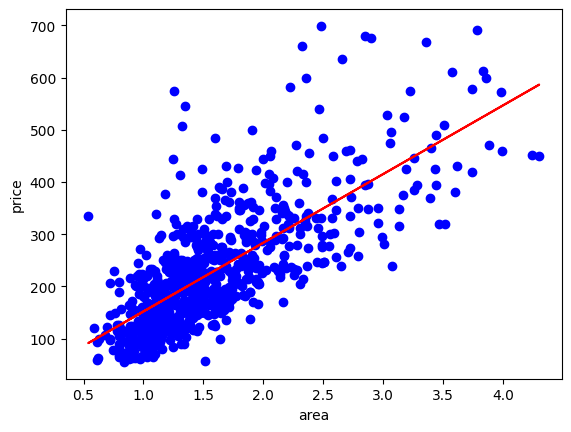

In [12]:
import matplotlib.pyplot as plt
plt.ion()
plt.xlabel("area")
plt.ylabel("price")

# Plot area vs price
plt.plot(x_area, y, 'o', color='blue')
plt.plot(x_area, y_prime, '-', color='red')